# Projeto Covid 19
## Digitall Innovation One

Primeiro vamos importar algumas bibliotecas necessárias para as atividades de hoje.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go  

from datetime import datetime

In [2]:
#importar dados para trabalho
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

In [3]:
df = pd.read_csv(url,parse_dates=["ObservationDate","Last Update"])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [4]:
#conferir os tipos de dados de cada coluna
df.dtypes
#Tipo objects é string.

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [5]:
#Nomes de colunas não devem ter letras maiúsculas e  nem caracteres especiais
#implementar rotina para padronizar os nomes.

import re #regular expressions

def corrige_colunas(col_name):
    return re.sub(r"[/| ]","",col_name).lower()
   
corrige_colunas("AdpG/e ou")  

'adpgeou'

In [6]:
# corrigindo nomes das colunas
df.columns = [corrige_colunas(col) for col in df.columns]
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Brasil
selecionando dados do Brasil para investigar

In [7]:
df.countryregion.value_counts() # mostra total de cada pais
df.countryregion.unique() # mostra lista de todos os paises
df.loc[df.countryregion=='Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [8]:
dadosBrasil = df.loc[
    
    (df.countryregion=='Brazil') &
    (df.confirmed > 0)
    
]
dadosBrasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos confirmados no Brasil
Gráfico de casos confirmados usando px

In [9]:
px.line(dadosBrasil,'observationdate','confirmed',title='Casos confirmados no Brasil')

# Evolução diária dos casos confirmados no Brasil

In [10]:
#vamos utilizar uma função anônima (lambda) e a função map para realizar esta tarefa
# dadosBrasil.shape() > pega dimensões dos dados linhas x colunas
# np.arange() > itera em  um range
dadosBrasil.shape
dadosBrasil['novoscasos'] = list(map(
    
    lambda x: 0 if (x==0) else dadosBrasil['confirmed'].iloc[x] - dadosBrasil['confirmed'].iloc[x-1],
    np.arange(dadosBrasil.shape[0])
    
))

dadosBrasil
# converting to CSV file
dadosBrasil.to_csv("dadosBrasil_covid19.csv")

C:\Users\lucca\AppData\Local\Temp\ipykernel_16260\1625407450.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Novos casos diários

In [11]:
px.line(dadosBrasil,'observationdate','novoscasos',title='Novos casos diários no Brasil')

# Número de mortes por Covid 19 no Brasil

In [12]:
fig = go.Figure()
fig.add_trace(
    
    go.Scatter(x=dadosBrasil.observationdate, y=dadosBrasil.deaths, name='Mortes',
               mode='lines+markers',line={'color':'red'})
    
)

# layout
fig.update_layout(title='Mortes por Covid 19 no Brasil')
fig.show()

# Cálculo da taxa de crescimento

i = (presente/passado)**1/n - 1

In [13]:
def taxa_de_crescimento(data,variable,data_inicio=None,data_fim=None):
    
    #se data_inicio é None pega a primeira data com valor > 0
    if (data_inicio == None):
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if (data_fim == None):
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    #valor presente e valor passado
    passado = data.loc[data.observationdate==data_inicio,variable].values[0]
    presente = data.loc[data.observationdate==data_fim,variable].values[0]    
    
    #numero de dias avaliados
    n = (data_fim - data_inicio).days
    i = (presente - passado)**(1/n) - 1
    
    return i*100

#taxa média de crescimento.
taxa_de_crescimento(dadosBrasil,'confirmed')

16.27182837869272

In [14]:
def taxa_de_crescimento_diaria(data,variable,data_inicio=None):
    
    #se data_inicio é None pega a primeira data com valor > 0
    if (data_inicio == None):
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()
     
    #numero de dias avaliados
    n = (data_fim - data_inicio).days
    
    #calcular taxas diariamente
    
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1])/data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

#taxa diaria de crescimento.
taxas_diarias = taxa_de_crescimento_diaria(dadosBrasil,'confirmed')
 
taxas_diarias 

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [15]:
primeiro_dia = dadosBrasil.observationdate.loc[dadosBrasil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia,dadosBrasil.observationdate.max())[1:],
        y=taxas_diarias,title="Taxa de crescimento diário da Covid 19 no Brasil")

# Predições
Precisamos decompor as séries temporais em tendência, sazonalidade e ruído.

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [17]:
confirmadosBrasil = dadosBrasil.confirmed
confirmadosBrasil.index = dadosBrasil.observationdate
confirmadosBrasil
confirmadosBrasil.to_csv("confirmadosBrasil_covid19.csv")


In [18]:
#decompondo os dados 
res = seasonal_decompose(confirmadosBrasil)

C:\Users\lucca\AppData\Local\Temp\ipykernel_16260\470396459.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



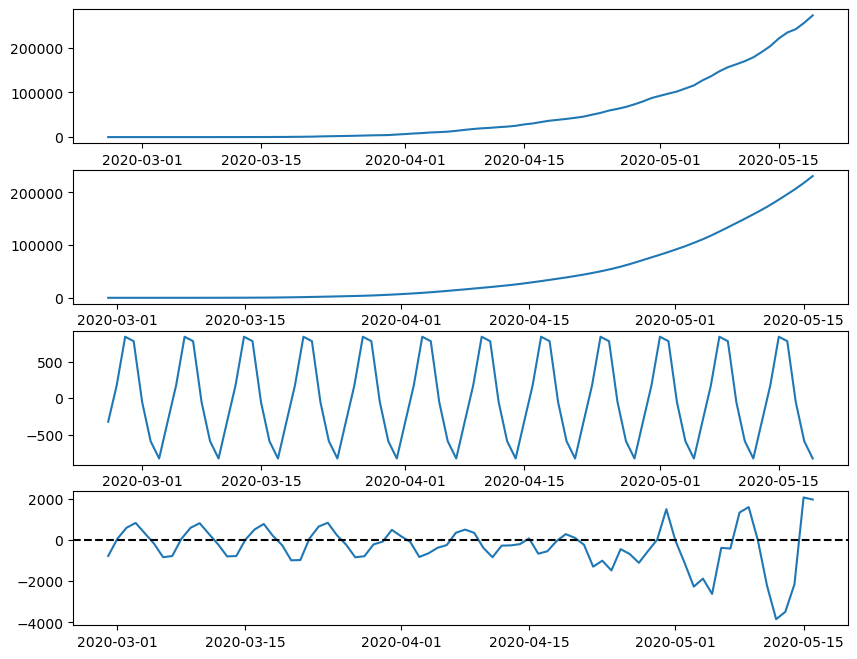

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmadosBrasil.index,res.resid)
ax4.axhline(0,linestyle='dashed',c='black')
fig.show()


# Modelagem com ARIMA
 
 MEDIA MOVEL INTEGRADA AUTOREGRESSIVA 

In [20]:
# Instalar o pacote de modelagem arima
! pip install pmdarima

In [21]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmadosBrasil)

In [22]:
fig = go.Figure(go.Scatter(
    x=confirmadosBrasil.index,y=confirmadosBrasil,name="Observados"
))
fig.add_trace(go.Scatter(
    x=confirmadosBrasil.index,y=modelo.predict_in_sample(),name="Preditos"
))
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20','2020-06-20'),y=modelo.predict(31),name='Forecast'
))
fig.update_layout(title='Previsão dos casos confirmados no Brasil para os proximos 30 dias')
fig.show()

# Modelo de crescimento para prever a virada
vamos usar a biblioteca fbprophet

In [23]:
#instalando a prophet
#! conda install -c conda-forge prophet

In [24]:
from prophet import Prophet

c:\Users\lucca\anaconda3\envs\machine_learning\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [25]:
# depois de instalar a biblioteca plotly no prompt com: pip install plotly==5.10
import plotly.express as px
import plotly.graph_objects as go  

In [26]:
# importing dados do Brasil do arquivo dadosBrasil.covid19.csv
#confirmadosBrasil = pd.read_csv("confirmadosBrasil_covid19.csv")
confirmadosBrasil

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

# Modelo de crescimento com a fbprophet

In [27]:
from fbprophet import Prophet

In [28]:
#preprocessamentops
train = confirmadosBrasil.reset_index()[: -5]
test = confirmadosBrasil.reset_index()[-5 :]

#renomeando a colunas de train e test par o padrao do fbprophet

train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)

#definindo modelo de crescimento
profetaModel = Prophet(growth='logistic',changepoints=['2020-03-21','2020-03-30',
                        '2020-04-25','2020-05-03','2020-05-10'])

pop_Brasil = 211463256 # estimativa da populaçao do Brasil (IBGE)
train['cap'] = pop_Brasil

#treinamento do modelo
profetaModel.fit(train)

#construindo as previsoes par o futuro

future_dates = profetaModel.make_future_dataframe(periods=200)
future_dates['cap'] = pop_Brasil
forecast = profetaModel.predict(future_dates)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\lucca\anaconda3\envs\machine_learning\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\lucca\anaconda3\envs\machine_learning\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\lucca\anaconda3\envs\machine_learning\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [29]:
#Atualizando nbformat no prompt para mostrar grafico
#conda install -c conda-forge nbformat

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
#fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de cados confirmados no Brasil')
fig.show()